In [1]:
!python -m pip install --user --upgrade pip

In [2]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Modeling algorithms
# General
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from scipy import stats

# Model selection
from sklearn.model_selection import train_test_split

# Evaluation metrics
# for classification
from sklearn import metrics
import geopandas as gpd

In [3]:
location = 'D:/Analysis/BigData-PythonAnalysis-main/서울시_집계구_보행.csv'
ped_data = pd.read_csv(location,encoding="EUC-KR")
ped_data

,TOT_REG_CD,공공기관,보육시설,사회복지시,버스정류장수,버스승하차,지하철(1km이내),지하철거리점수,지하철승하차,구별총생활,구별총생활인구,상가수,어린이집개수,면적,병원수
0,1101053010001,6,4,0,3,196.56,4,24.00,0,277143,"8,940.10",7.00,6.00,18821,0
1,1101053010002,7,2,0,2,428.18,3,27.00,52315,1373417,"44,303.77",74.00,7.00,37082,0
2,1101053010003,10,6,0,12,497.20,4,26.00,34690,1245899,"40,190.29",37.00,10.00,218981,0
3,1101053010004,10,2,0,5,"3,152.08",4,29.00,52315,1515584,"48,889.81",113.00,10.00,44920,0
4,1101053010005,11,2,0,6,"2,136.02",3,29.00,52315,1038484,"33,499.48",122.00,11.00,70996,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19148,1125074030501,2,2,4,0,0.00,3,26.00,27891,231764,"7,476.26",13.00,2.00,2711,0
19149,1125074030701,2,1,2,0,0.00,3,28.00,27891,651864,"21,027.87",0.00,2.00,3522,0
19150,1125074030801,3,2,3,0,0.00,3,27.00,27891,303687,"9,796.35",9.00,3.00,5538,0
19151,1125074031101,3,2,3,0,0.00,3,26.00,27891,115108,"3,713.16",8.00,3.00,3535,0


In [4]:
ped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19153 entries, 0 to 19152
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TOT_REG_CD  19153 non-null  int64  
 1   공공기관        19153 non-null  int64  
 2   보육시설        19153 non-null  int64  
 3   사회복지시       19153 non-null  int64  
 4   버스정류장수      19153 non-null  int64  
 5   버스승하차       19153 non-null  float64
 6   지하철(1km이내)  19153 non-null  int64  
 7   지하철거리점수     19143 non-null  float64
 8   지하철승하차      19153 non-null  int64  
 9   구별총생활       19153 non-null  int64  
 10  구별총생활인구     19153 non-null  float64
 11  상가수         19143 non-null  float64
 12  어린이집개수      18738 non-null  float64
 13  면적          19153 non-null  int64  
 14  병원수         19153 non-null  int64  
dtypes: float64(5), int64(10)
memory usage: 2.2 MB


In [5]:
ped_data.rename(columns={'사회복지시':'SOC_NUM','지하철(1km이내)':'SUB_NUM','지하철거리점수':'SUB_DIS_POINT'
 ,'버스정류장수':'BUS_NUM','버스승하차':'BUS_AVG','지하철승하차':'SUB_AVG'
 ,'구별총생활':'TOT_POP_GU','구별총생활인구':'TOT_POP_GU_AVG','상가수':'SHOP_NUM'
 , '어린이집개수':'CHILD_NUM','면적':'AREA','병원수':'HOSP_NUM'}
 ,inplace=True)

In [6]:
ped_data['SUB_DIS_POINT'].fillna(0,inplace=True)
ped_data['SUB_DIS_POINT'].isnull().sum()
ped_data['SHOP_NUM'].fillna(0,inplace=True)
ped_data['SHOP_NUM'].isnull().sum()
ped_data['CHILD_NUM'].fillna(0,inplace=True)
ped_data['SHOP_NUM'].isnull().sum()

0

In [8]:
ped_data['FACILITY_NUM'] = (ped_data['공공기관']+ped_data['보육시설']+ped_data['CHILD_NUM']+ped_data['SOC_NUM'])
ped_data = ped_data.drop(['공공기관','보육시설','CHILD_NUM','SOC_NUM'],axis = 1)

In [12]:
display(ped_data.columns)

Index(['TOT_REG_CD', 'BUS_NUM', 'BUS_AVG', 'SUB_NUM', 'SUB_DIS_POINT',
       'SUB_AVG', 'TOT_POP_GU', 'TOT_POP_GU_AVG', 'SHOP_NUM', 'AREA',
       'HOSP_NUM', 'FACILITY_NUM'],
      dtype='object')

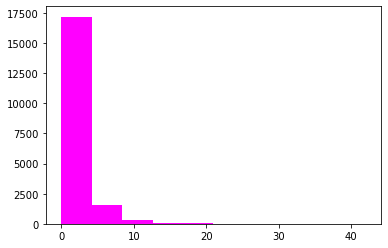

In [42]:
plt.hist(ped_data['BUS_NUM'],color='magenta')
plt.show()

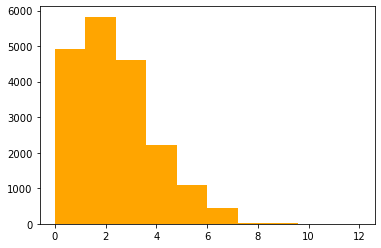

In [41]:
plt.hist(ped_data['SUB_NUM'],color='orange')
plt.show()

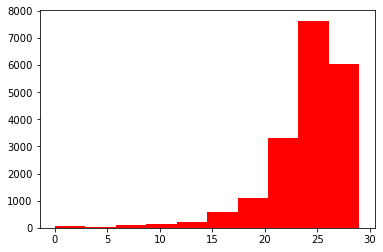

In [40]:
plt.hist(ped_data['SUB_DIS_POINT'],color='red')
plt.show()

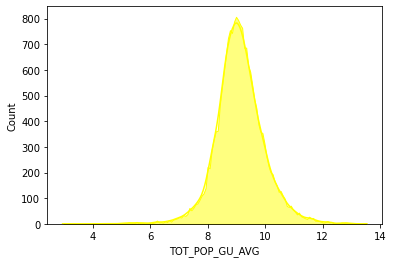

In [64]:
ped_data.loc[:,'TOT_POP_GU_AVG'] = np.log1p(ped_data['TOT_POP_GU_AVG'])
sns.histplot(data=ped_data,x='TOT_POP_GU_AVG',color='yellow',element="poly",kde=True)
plt.show()

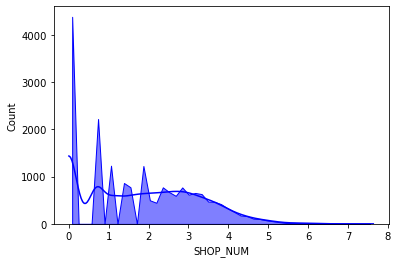

In [65]:
ped_data.loc[:,'SHOP_NUM'] = np.log1p(ped_data['SHOP_NUM'])
sns.histplot(data=ped_data,x='SHOP_NUM',color='blue',element="poly",kde=True)
plt.show()

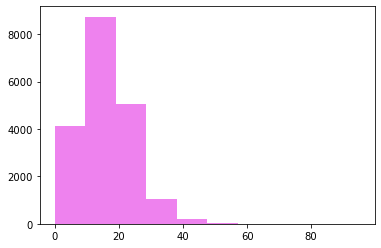

In [39]:
plt.hist(ped_data['FACILITY_NUM'],color='violet')
plt.show()

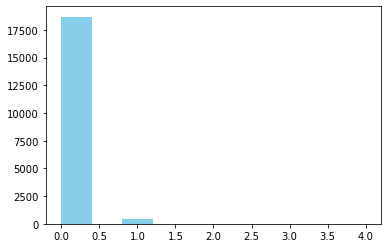

In [27]:
plt.hist(ped_data['HOSP_NUM'],color='skyblue')
plt.show()

In [46]:
sorted_data = ped_data.sort_values(by=['HOSP_NUM'], axis=0,ascending=False)


In [50]:
sorted_data['POPoverAREA'] = (sorted_data['TOT_POP_GU_AVG']/sorted_data['AREA'])

In [60]:
sorted_data.head(100)

,TOT_REG_CD,BUS_NUM,BUS_AVG,SUB_NUM,SUB_DIS_POINT,SUB_AVG,TOT_POP_GU,TOT_POP_GU_AVG,SHOP_NUM,AREA,HOSP_NUM,FACILITY_NUM,POPoverAREA
15220,1122053030001,6,466.93,3,27.00,70095,938737,"30,281.84",61.00,56039,4,9.00,0.54
10604,1116058010002,5,"2,164.17",2,29.00,58719,760880,"24,544.52",76.00,29179,4,9.00,0.84
16073,1123053020004,6,"1,247.67",6,29.00,44752,1377245,"44,427.26",146.00,101170,3,13.00,0.44
16330,1123064070002,3,"1,679.33",4,22.00,0,1134208,"36,587.35",123.00,48464,3,11.00,0.75
14890,1121080010002,2,"2,319.10",2,26.00,76764,847337,"27,333.45",35.00,19337,3,18.00,1.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15546,1122060010001,15,"3,120.29",5,29.00,57565,9719219,"313,523.19","1,347.00",244381,1,23.00,1.28
1309,1104067020001,0,0.00,2,25.00,62140,216486,"6,983.42",4.00,19595,1,9.00,0.36
1314,1104067020006,5,"1,114.41",3,24.00,0,777946,"25,095.03",49.00,48538,1,13.00,0.52
17861,1124069010107,0,0.00,3,22.00,0,468586,"15,115.68",0.00,31903,1,10.00,0.47


In [59]:
sorted_data['POPoverAREA'].quantile(.75)

1.063801996919918